<a href="https://colab.research.google.com/github/hacersafak/HandsOn3/blob/main/PHYS437_PROJECTCODE_2423457_HACER_SAFAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Simulating Photon-Baryon Decoupling in the Early Universe Using Quantum Computing and Jordan-Wigner Mapping
!pip install qiskit
!pip install qiskit-Aer
!pip install qiskit_algorithms
!pip install qiskit_nature
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-ibm-runtime
!pip install scipy

In [ ]:
from qiskit import QuantumCircuit , assemble
from qiskit_aer import Aer
from qiskit import transpile
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Pauli
from qiskit.quantum_info import Statevector
from qiskit_nature.second_q.operators import FermionicOp
from qiskit.circuit.library import RealAmplitudes
from qiskit_aer import AerSimulator
from qiskit_algorithms import VQD
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.quantum_info import Statevector
from qiskit_algorithms import TimeEvolutionProblem
from qiskit_algorithms import TrotterQRTE
from qiskit.primitives import StatevectorEstimator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# defining hamiltonian with fermionicop
# H = hw(a†a + 1/2)
omega=1
fermionic_hamiltonian = FermionicOp(
    {
        "+_0 -_0": omega,  # a†a term with coefficient ω
        "": omega / 2      # Identity term with coefficient ω/2 (representing zero-point energy)
    },
)
mapper = JordanWignerMapper()
qubit_hamiltonian = mapper.map(fermionic_hamiltonian)

print(qubit_hamiltonian)

SparsePauliOp(['I', 'Z'],
              coeffs=[ 1. +0.j, -0.5+0.j])


In [ ]:
#construct the circuit
n_qubits = qubit_hamiltonian.num_qubits  # Number of qubits from the qubit Hamiltonian
qc = QuantumCircuit(n_qubits)
qc.h(0)


In [ ]:
#VQE
ansatz = RealAmplitudes(n_qubits, reps=3)
optimizer = SLSQP(maxiter=2000)
estimator = Estimator()

def vqe_generate(ansatz, optimizer, estimator):
  vqe = VQE(estimator, ansatz, optimizer)
  backend = AerSimulator()
  result = vqe.compute_minimum_eigenvalue(qubit_hamiltonian)
  return result.eigenvalue.real

a=vqe_generate(ansatz, optimizer, estimator)
print(a)

<ipython-input-115-7c343657afba>:4: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


0.5000006467325886


In [ ]:
#VQD

estimator = Estimator()
sampler = Sampler()

k = 4  # Number of states to find (ground state + excited states)
eigenvalues = []

fidelity = ComputeUncompute(sampler)  # Example: Using ComputeUncompute fidelity


vqd = VQD(estimator, fidelity, ansatz, optimizer, k=k)
result = vqd.compute_eigenvalues(operator=qubit_hamiltonian)
vqd_values = result.eigenvalues
print(vqd_values)


<ipython-input-119-3fcc4a3ee2f4>:3: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-119-3fcc4a3ee2f4>:4: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


[0.50000039+0.j 1.5000003 +0.j 1.50007847+0.j 1.50000328+0.j]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


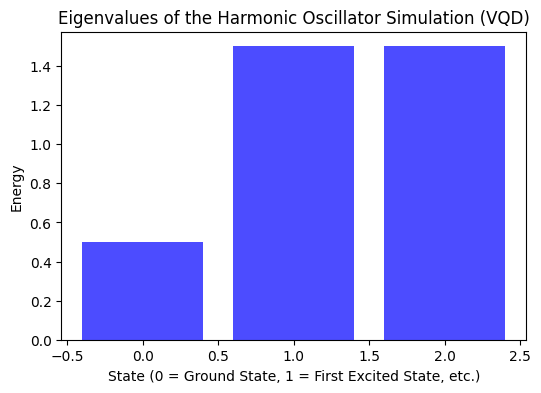

In [ ]:
# Plotting the eigenvalues
import matplotlib.pyplot as plt

# Assuming vqd_values contains the computed eigenvalues
plt.figure(figsize=(6, 4))
plt.bar(range(len(vqd_values)), vqd_values, color='blue', alpha=0.7)
plt.xlabel('State (0 = Ground State, 1 = First Excited State, etc.)')
plt.ylabel('Energy')
plt.title('Eigenvalues of the Harmonic Oscillator Simulation (VQD)')
plt.show()

<ipython-input-121-e01393698625>:22: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


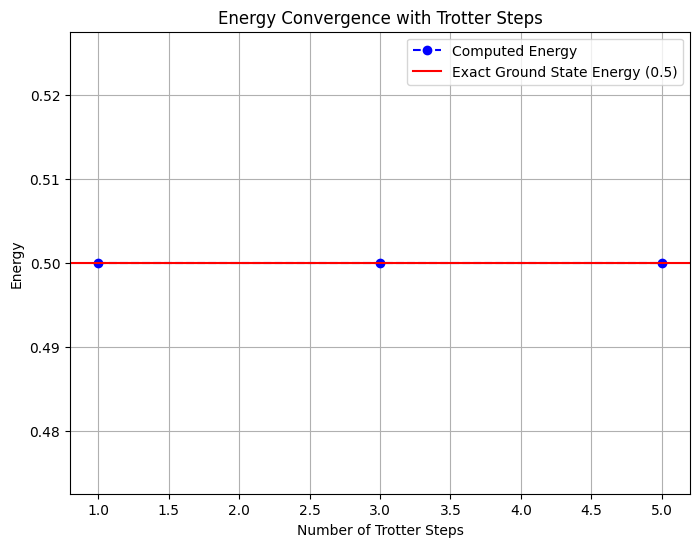

Statevector([-0.70003041-0.09978691j, -0.46219584+0.53514018j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        +0.j        ],
            dims=(2, 2, 2, 2))


In [ ]:


# Define the Hamiltonian parameters
omega = 1.0  # Angular frequency
n_qubits = 1  # Single harmonic oscillator

# Define the Hamiltonian in SparsePauliOp form for a single qubit (harmonic oscillator model)
# H = omega * (a†a + 1/2) -> mapped to Pauli operators
hamiltonian = SparsePauliOp.from_list([("Z", omega / 2), ("I", omega / 2)])

# Prepare the initial state (ground state of the harmonic oscillator)
qc = QuantumCircuit(n_qubits)
qc.h(0)  # Example initial state (apply Hadamard for simplicity, use Fock state for true harmonic oscillator ground state)
qc_for_statevector = qc.copy()
qc_for_statevector.remove_final_measurements()  # Ensure no measurement in the copied circuit
initial_state = Statevector(qc_for_statevector)

# Define parameters for Trotter evolution
time = 1.0  # Total evolution time
trotter_steps_list = [1, 3, 5]  # Number of Trotter steps to test
energies = []  # To store computed energies

# Create the estimator for computing expectation values
estimator = Estimator()

# Perform time evolution and compute energies
for steps in trotter_steps_list:
    # Create the Trotterized evolution algorithm
    trotter = TrotterQRTE(num_timesteps=steps, estimator=estimator)

    # Define the time evolution problem
    problem = TimeEvolutionProblem(
        hamiltonian=hamiltonian,
        time=time,
        aux_operators=[hamiltonian],  # Include Hamiltonian to compute its expectation value
        initial_state=initial_state,
    )

    # Solve the problem
    result = trotter.evolve(problem)
    evolved_state = Statevector(result.evolved_state)

    # Compute the expectation value of the Hamiltonian
    energy = evolved_state.expectation_value(hamiltonian).real
    energies.append(energy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(trotter_steps_list, energies, marker="o", linestyle="--", color="blue", label="Computed Energy")
plt.axhline(y=omega / 2, color="red", linestyle="-", label="Exact Ground State Energy (0.5)")
plt.xlabel("Number of Trotter Steps")
plt.ylabel("Energy")
plt.title("Energy Convergence with Trotter Steps")
plt.legend()
plt.grid()
plt.show()

print(statevector)

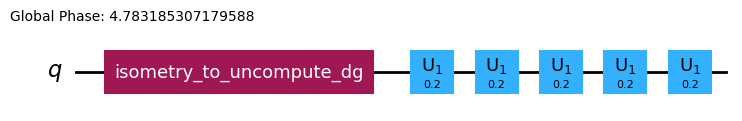

In [ ]:
# Show decomposed circuit
result.evolved_state.decompose(reps=2).decompose("disentangler_dg").decompose(
    "multiplex1_reverse_dg"
).draw("mpl")


Generated Hamiltonian for 1 qubits:
Fermionic Operator
number spin orbitals=1, number terms=2
  1.0 * ( +_0 -_0 )
+ 0.5
--------------------------------------------------


<ipython-input-125-508b689f3b13>:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-125-508b689f3b13>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)


Generated Hamiltonian for 2 qubits:
Fermionic Operator
number spin orbitals=2, number terms=3
  1.0 * ( +_0 -_0 )
+ 0.5
+ 1.0 * ( +_1 -_1 )
--------------------------------------------------


<ipython-input-125-508b689f3b13>:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-125-508b689f3b13>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)


Generated Hamiltonian for 3 qubits:
Fermionic Operator
number spin orbitals=3, number terms=4
  1.0 * ( +_0 -_0 )
+ 0.5
+ 1.0 * ( +_1 -_1 )
+ 1.0 * ( +_2 -_2 )
--------------------------------------------------


<ipython-input-125-508b689f3b13>:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-125-508b689f3b13>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)


Generated Hamiltonian for 4 qubits:
Fermionic Operator
number spin orbitals=4, number terms=5
  1.0 * ( +_0 -_0 )
+ 0.5
+ 1.0 * ( +_1 -_1 )
+ 1.0 * ( +_2 -_2 )
+ 1.0 * ( +_3 -_3 )
--------------------------------------------------


<ipython-input-125-508b689f3b13>:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()
<ipython-input-125-508b689f3b13>:46: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards th

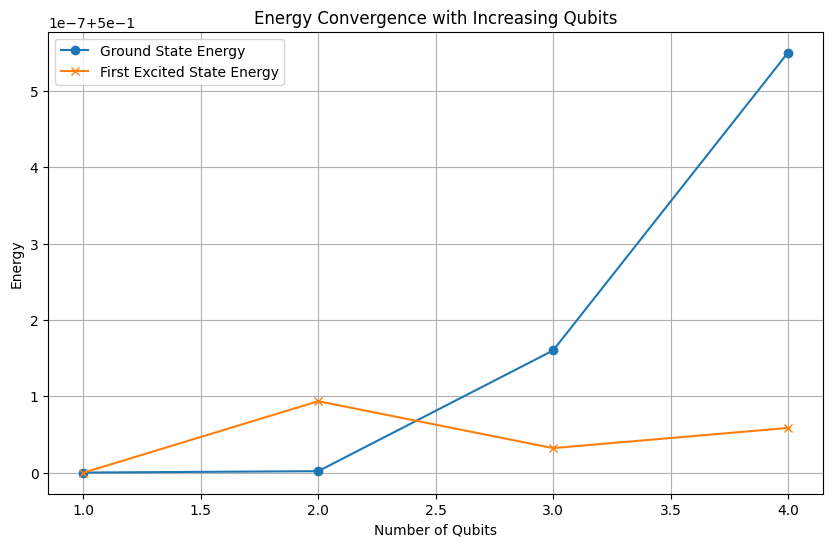

In [ ]:
import matplotlib.pyplot as plt



# Store ground state and excited state energies for each qubit number
ground_state_energies = []
excited_state_energies = []


# Define base parameters for the Hamiltonian
omega = 1.0  # Example parameter

# Number of qubits to test
qubit_numbers = [1, 2, 3, 4]  # Example list of qubit numbers

for n_qubits in qubit_numbers:
    terms = {}  # Initialize terms for the Fermionic Hamiltonian

    # Add terms dynamically based on the number of qubits
    for i in range(n_qubits):
        terms[f"+_{i} -_{i}"] = omega  # Diagonal term
        terms[""] = terms.get("", 0) + omega / (2 * n_qubits)  # Constant energy term, scaled with n_qubits

    # Create the Fermionic Hamiltonian
    fermionic_hamiltonian = FermionicOp(terms)

    # Print or analyze the generated Hamiltonian
    print(f"Generated Hamiltonian for {n_qubits} qubits:")
    print(fermionic_hamiltonian)
    print("-" * 50)


    mapper = JordanWignerMapper()
    qubit_hamiltonian = mapper.map(fermionic_hamiltonian)

    ansatz = RealAmplitudes(n_qubits, reps=2)
    optimizer = SLSQP(maxiter=2000)
    estimator = Estimator()

    # VQE for ground state
    ground_state_energy = vqe_generate(ansatz, optimizer, estimator)
    ground_state_energies.append(ground_state_energy)

    # VQD for excited states
    k = 3  # Number of excited states to compute
    vqd = VQD(estimator, ComputeUncompute(Sampler()), ansatz, optimizer, k=k)
    vqd_result = vqd.compute_eigenvalues(operator=qubit_hamiltonian)
    excited_state_energies.append(vqd_result.eigenvalues)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(qubit_numbers, ground_state_energies, label="Ground State Energy", marker='o')
plt.plot(qubit_numbers, [v[0] for v in excited_state_energies], label="First Excited State Energy", marker='x')
plt.xlabel('Number of Qubits')
plt.ylabel('Energy')
plt.title('Energy Convergence with Increasing Qubits')
plt.legend()
plt.grid(True)
plt.show()

